In [30]:
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape
from tensorflow.keras.models import Sequential
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("fashion-mnist_train.csv").iloc[:,1:]
df = df.astype("float32") / 255.0
df.shape

(60000, 784)

In [32]:
dataset = tf.data.Dataset.from_tensor_slices(df)
dataset = dataset.map(lambda x: tf.reshape(x, (28, 28)))
dataset = dataset.shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(1)

In [33]:
codings_size=30
batch_size=32
generator=Sequential([
    Input((codings_size,)),
    Dense(100,activation="selu"),
    Dense(150,activation="selu"),
    Dense(28*28,activation="sigmoid"),
    Reshape((28,28))
])

In [34]:
dicriminitor=Sequential([
    Input((28,28)),
    Flatten(),
    Dense(100,activation="selu"),
    Dense(150,activation="selu"),
    Dense(1,activation="sigmoid"),
])

In [35]:
gan=Sequential([
    generator,
    dicriminitor
])

In [36]:
dicriminitor.compile(
    optimizer="adam",
    loss="binary_crossentropy"

)

In [37]:
dicriminitor.trainable=False

In [38]:
gan.compile(
    optimizer="adam",
    loss="binary_crossentropy"

)

In [39]:
def plot_compared_generated_real_images(generator, noise_dim, n=16):
    noise = tf.random.normal([n, noise_dim])
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(2 * n, 4))
    
    for i in range(n):

        plt.subplot(2, n, i + 1)
        plt.imshow(df.iloc[i].to_numpy().reshape(28, 28), cmap="binary")
        plt.axis("off")

        plt.subplot(2, n, n + i + 1)
        plt.imshow(generated_images[i], cmap="binary")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [40]:
def train_gan(gan, dataset, batch_size, coding_size, n_epochs=50):
    generator, discriminator = gan.layers

    for epoch in range(n_epochs):
        print("epoch : "+str(epoch))
        for x_batch in dataset:
            x_batch = tf.cast(x_batch, tf.float32)

            noise = tf.random.normal([batch_size, coding_size])
            generated_images = generator(noise)

            x_fake_and_real = tf.concat([generated_images, x_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size, dtype=tf.float32)

            discriminator.trainable = True
            discriminator.train_on_batch(x_fake_and_real, y1)

            noise = tf.random.normal([batch_size, coding_size])
            y2 = tf.constant([[1.]] * batch_size, dtype=tf.float32)

            discriminator.trainable = False
            gan.train_on_batch(noise, y2)

    plot_compared_generated_real_images(generator, coding_size)

In [41]:
def predict_gan(generator, coding_size, n_images=16):
    noise = tf.random.normal([n_images, coding_size])
    generated = generator(noise, training=False)

    plot_compared_generated_real_images(generator, coding_size)


epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9
epoch : 10
epoch : 11
epoch : 12
epoch : 13
epoch : 14
epoch : 15
epoch : 16
epoch : 17
epoch : 18
epoch : 19
epoch : 20
epoch : 21
epoch : 22
epoch : 23
epoch : 24
epoch : 25
epoch : 26
epoch : 27
epoch : 28
epoch : 29
epoch : 30
epoch : 31
epoch : 32
epoch : 33
epoch : 34
epoch : 35
epoch : 36
epoch : 37
epoch : 38
epoch : 39
epoch : 40
epoch : 41
epoch : 42
epoch : 43
epoch : 44
epoch : 45
epoch : 46
epoch : 47
epoch : 48
epoch : 49


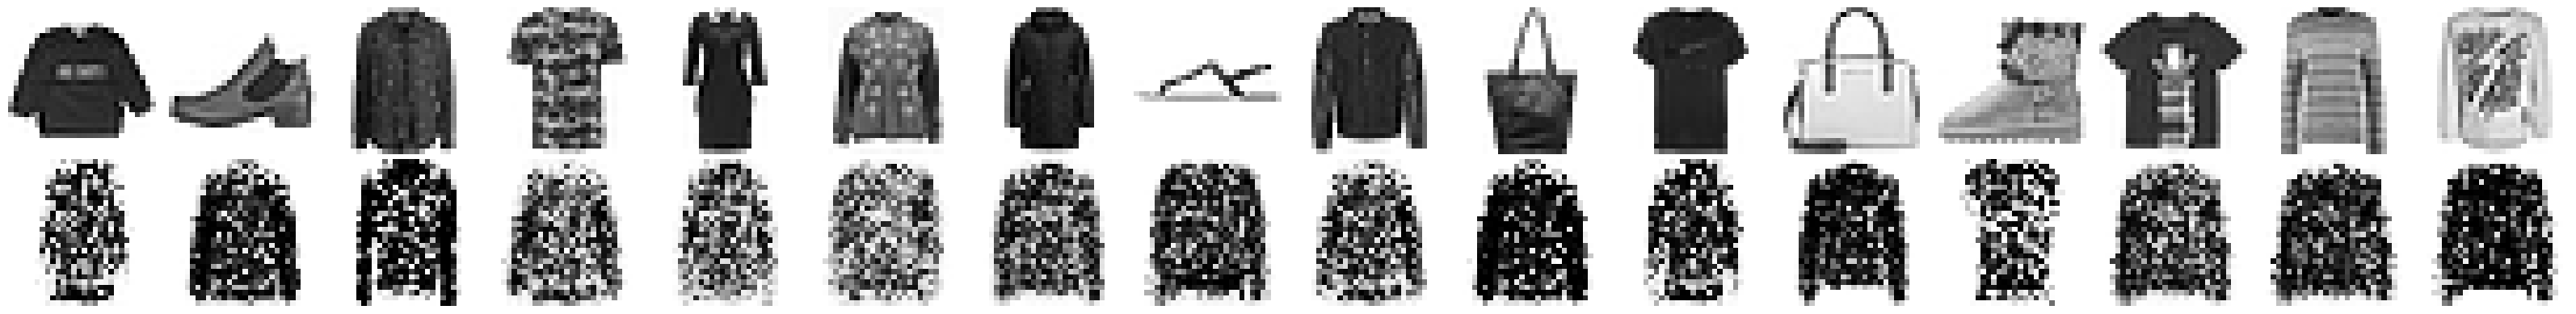

In [42]:
train_gan(gan,dataset,batch_size,codings_size)

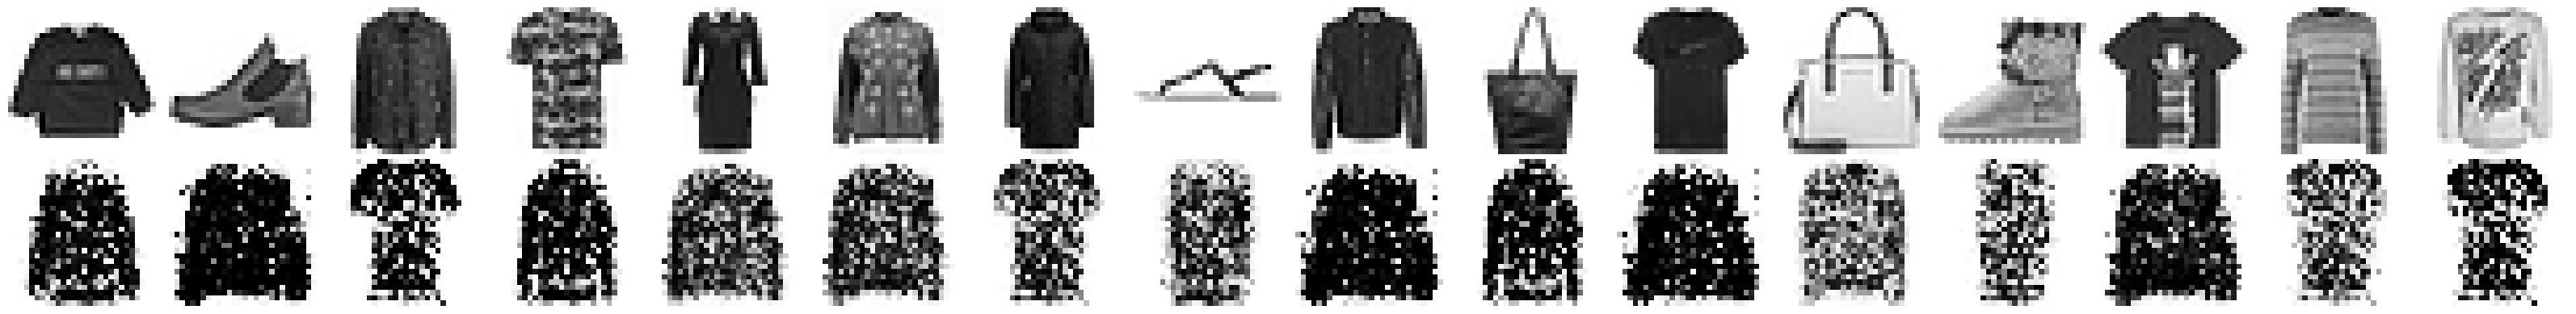

In [43]:
predict_gan(generator, codings_size, n_images=8)